In [92]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [93]:
df1 = pd.read_excel('Sales.xlsx',sheet_name='Sales')

In [94]:
df1.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [95]:
## Checking the shape of the data: Number of columns and rows
df1.shape

(4520, 20)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [97]:
# Checking the null values in the data
df1.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [98]:
df1_num = df1.select_dtypes(['float64','int64'])
df1_cat = df1.select_dtypes(['object'])

In [99]:
df1_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   ExistingProdType      4520 non-null   int64  
 5   NumberOfPolicy        4475 non-null   float64
 6   MonthlyIncome         4284 non-null   float64
 7   Complaint             4520 non-null   int64  
 8   ExistingPolicyTenure  4336 non-null   float64
 9   SumAssured            4366 non-null   float64
 10  LastMonthCalls        4520 non-null   int64  
 11  CustCareScore         4468 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 423.9 KB


In [100]:
df1_num.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
ExistingProdType          0
NumberOfPolicy           45
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [101]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Channel         4520 non-null   object
 1   Occupation      4520 non-null   object
 2   EducationField  4520 non-null   object
 3   Gender          4520 non-null   object
 4   Designation     4520 non-null   object
 5   MaritalStatus   4520 non-null   object
 6   Zone            4520 non-null   object
 7   PaymentMethod   4520 non-null   object
dtypes: object(8)
memory usage: 282.6+ KB


In [103]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [104]:
imr = imputer.fit(df1_num)
df1_num = pd.DataFrame(imr.transform(df1_num), columns=df1_num.columns)

In [106]:
df1_num.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [107]:
df1_new = pd.concat([df1_num, df1_cat], axis=1, join='inner')

In [108]:
df1_new.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
Designation             0
MaritalStatus           0
Zone                    0
PaymentMethod           0
dtype: int64

In [109]:
# Checking the duplicates in the data
dups = df1_new.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [110]:
df1_new.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4520.000000,4520.000000
mean,7.002260e+06,4077.838274,14.405752,14.395575,3.688938,3.569690,22823.253097,0.287168,4.084071,6.186020e+05,4.626991,3.066814
std,1.304956e+03,1403.321711,8.771646,8.742521,1.015769,1.449302,4764.892420,0.452491,3.285152,2.421172e+05,3.620132,1.375007
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,8.000000,8.000000,3.000000,2.000000,19858.000000,0.000000,2.000000,4.444762e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,19.000000,19.000000,4.000000,5.000000,24531.750000,1.000000,5.000000,7.500105e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [111]:
# Fixing messy column names (containing spaces) for ease of use
df1_new.columns = df1_new.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [112]:
df1_new = df1_new.rename(columns = {'CustID': 'Customer_ID', 'AgentBonus': 'Agent_Bonus','CustTenure': 'Customer_Tenure', 'EducationField': 'Education_Field', 'ExistingProdType': 'Existing_Product_Type', 'NumberOfPolicy': 'Number_Of_Policy', 'MaritalStatus': 'Marital_Status','MonthlyIncome': 'Monthly_Income', 'ExistingPolicyTenure' : 'Existing_Policy_Tenure', 'SumAssured': 'Sum_Assured', 'PaymentMethod': 'Payment_Method', 'LastMonthCalls': 'Last_Month_Calls', 'CustCareScore': 'Customer_Care_Score' }, inplace = False)

In [113]:
# Removing unwanted column customer ID
df1_new = df1_new.drop(['Customer_ID'], axis = 1)
df1_new.head()

,Agent_Bonus,Age,Customer_Tenure,Existing_Product_Type,Number_Of_Policy,Monthly_Income,Complaint,Existing_Policy_Tenure,Sum_Assured,Last_Month_Calls,Customer_Care_Score,Channel,Occupation,Education_Field,Gender,Designation,Marital_Status,Zone,Payment_Method
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1.0,2.0,806761.0,5.0,2.0,Agent,Salaried,Graduate,Female,Manager,Single,North,Half Yearly
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0.0,3.0,294502.0,7.0,3.0,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1.0,2.0,578976.5,0.0,3.0,Agent,Free Lancer,Post Graduate,Male,Exe,Unmarried,North,Yearly
3,1791.0,11.0,13.0,3.0,3.0,17909.0,1.0,2.0,268635.0,0.0,5.0,Third Party Partner,Salaried,Graduate,Fe male,Executive,Divorced,West,Half Yearly
4,2955.0,6.0,13.0,3.0,4.0,18468.0,0.0,4.0,366405.0,2.0,5.0,Agent,Small Business,UG,Male,Executive,Divorced,West,Half Yearly


In [114]:
df1_new['Existing_Product_Type'] = df1_new['Existing_Product_Type'].astype(str)
df1_new['Complaint'] = df1_new['Complaint'].astype(str)
df1_new['Customer_Care_Score'] = df1_new['Customer_Care_Score'].astype(str)

In [115]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Agent_Bonus             4520 non-null   float64
 1   Age                     4520 non-null   float64
 2   Customer_Tenure         4520 non-null   float64
 3   Existing_Product_Type   4520 non-null   object 
 4   Number_Of_Policy        4520 non-null   float64
 5   Monthly_Income          4520 non-null   float64
 6   Complaint               4520 non-null   object 
 7   Existing_Policy_Tenure  4520 non-null   float64
 8   Sum_Assured             4520 non-null   float64
 9   Last_Month_Calls        4520 non-null   float64
 10  Customer_Care_Score     4520 non-null   object 
 11  Channel                 4520 non-null   object 
 12  Occupation              4520 non-null   object 
 13  Education_Field         4520 non-null   object 
 14  Gender                  4520 non-null   

In [116]:
df1_new.describe()

,Agent_Bonus,Age,Customer_Tenure,Number_Of_Policy,Monthly_Income,Existing_Policy_Tenure,Sum_Assured,Last_Month_Calls
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4520.000000
mean,4077.838274,14.405752,14.395575,3.569690,22823.253097,4.084071,6.186020e+05,4.626991
std,1403.321711,8.771646,8.742521,1.449302,4764.892420,3.285152,2.421172e+05,3.620132
min,1605.000000,2.000000,2.000000,1.000000,16009.000000,1.000000,1.685360e+05,0.000000
25%,3027.750000,8.000000,8.000000,2.000000,19858.000000,2.000000,4.444762e+05,2.000000
50%,3911.500000,13.000000,13.000000,4.000000,21606.000000,3.000000,5.789765e+05,3.000000
75%,4867.250000,19.000000,19.000000,5.000000,24531.750000,5.000000,7.500105e+05,8.000000
max,9608.000000,58.000000,57.000000,6.000000,38456.000000,25.000000,1.838496e+06,18.000000


In [117]:
df1_new['Gender'].value_counts()

Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64

In [118]:
df1_new['Gender'] = df1_new['Gender'].replace(['Fe male'],'Female')

In [119]:
df1_new['Gender'].value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

In [120]:
df1_new['Occupation'].value_counts()

Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64

In [122]:
df1_new['Occupation'] = df1_new['Occupation'].replace(['Laarge Business'],'Large Business')

In [123]:
df1_new['Occupation'].value_counts()

Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64

In [124]:
df1_new['Existing_Product_Type'].value_counts()

4.0    1916
3.0    1369
5.0     708
2.0     221
1.0     183
6.0     123
Name: Existing_Product_Type, dtype: int64

In [125]:
df1_new['Complaint'].value_counts()

0.0    3222
1.0    1298
Name: Complaint, dtype: int64

In [126]:
df1_new['Education_Field'].value_counts()

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: Education_Field, dtype: int64

In [127]:
df1_new['Education_Field'] = df1_new['Education_Field'].replace(['Diploma','Engineer','UG'],'Under Graduate')

In [128]:
df1_new['Education_Field'] = df1_new['Education_Field'].replace(['Graduate','MBA'],'Post Graduate')

In [129]:
df1_new['Education_Field'].value_counts()

Under Graduate    2324
Post Graduate     2196
Name: Education_Field, dtype: int64

In [131]:
df1_new['Designation'].value_counts()

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64

In [132]:
df1_new['Designation'] = df1_new['Designation'].replace(['Exe'],'Executive')

In [133]:
df1_new['Designation'].value_counts()

Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

In [134]:
df1_new['Marital_Status'].value_counts()

Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: Marital_Status, dtype: int64

In [135]:
df1_new['Marital_Status'] = df1_new['Marital_Status'].replace(['Unmarried'],'Single')

In [136]:
df1_new['Marital_Status'].value_counts()

Married     2268
Single      1448
Divorced     804
Name: Marital_Status, dtype: int64

In [138]:
df1_new['Customer_Care_Score'].value_counts()

3.0    1419
1.0     928
5.0     893
4.0     826
2.0     454
Name: Customer_Care_Score, dtype: int64

In [139]:
# Performing the Univariant analysis
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1_new[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df1_new[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1_new[column])
    plt.show()

In [140]:
df1_num_new = df1_new.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df1_num_new.columns.values)
lstnumericcolumns

['Agent_Bonus',
 'Age',
 'Customer_Tenure',
 'Number_Of_Policy',
 'Monthly_Income',
 'Existing_Policy_Tenure',
 'Sum_Assured',
 'Last_Month_Calls']

In [141]:
len(lstnumericcolumns)

8

Description of Agent_Bonus
----------------------------------------------------------------------------
count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: Agent_Bonus, dtype: float64 Distribution of Agent_Bonus
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

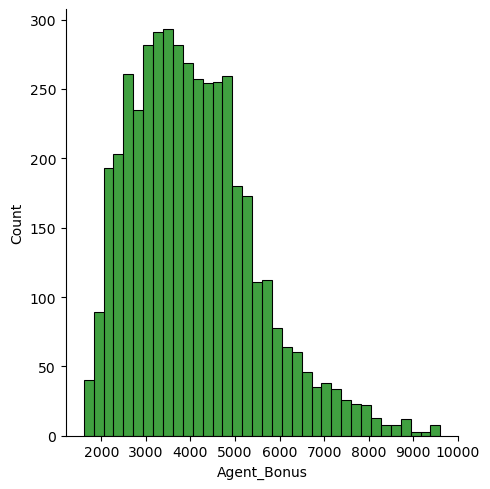

BoxPlot of Agent_Bonus
----------------------------------------------------------------------------


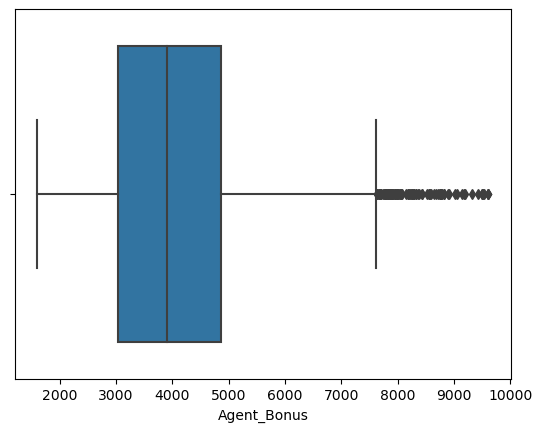

Description of Age
----------------------------------------------------------------------------
count    4520.000000
mean       14.405752
std         8.771646
min         2.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        58.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

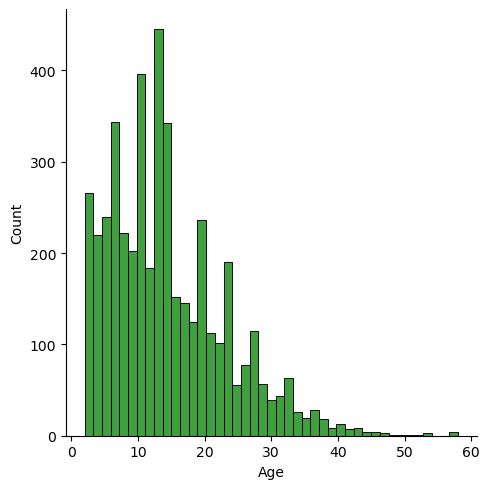

BoxPlot of Age
----------------------------------------------------------------------------


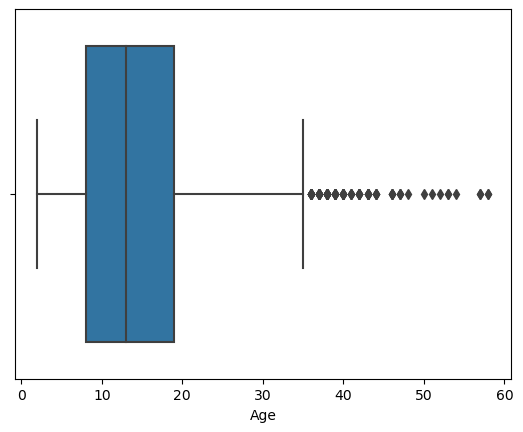

Description of Customer_Tenure
----------------------------------------------------------------------------
count    4520.000000
mean       14.395575
std         8.742521
min         2.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        57.000000
Name: Customer_Tenure, dtype: float64 Distribution of Customer_Tenure
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

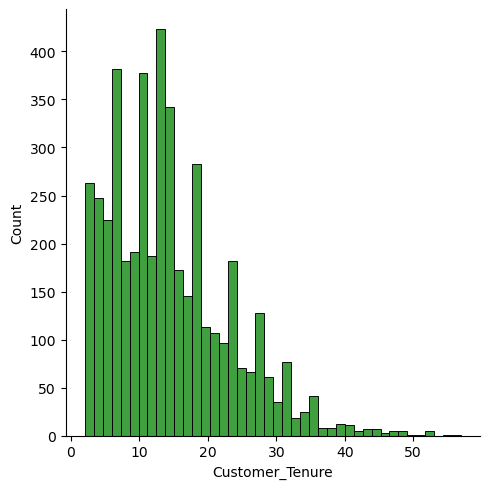

BoxPlot of Customer_Tenure
----------------------------------------------------------------------------


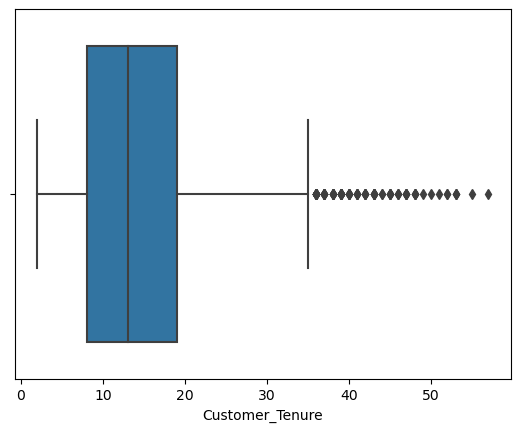

Description of Number_Of_Policy
----------------------------------------------------------------------------
count    4520.000000
mean        3.569690
std         1.449302
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Number_Of_Policy, dtype: float64 Distribution of Number_Of_Policy
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

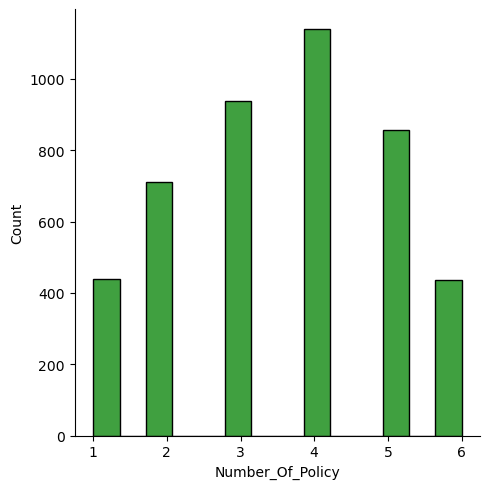

BoxPlot of Number_Of_Policy
----------------------------------------------------------------------------


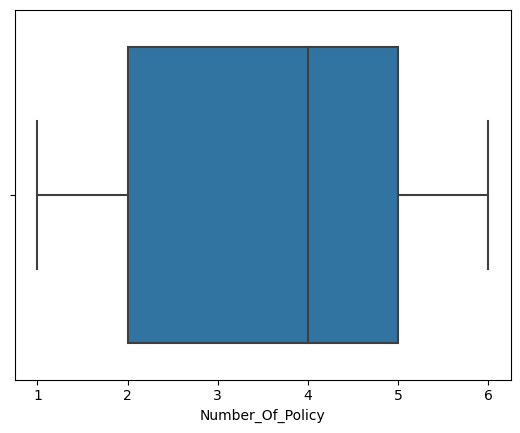

Description of Monthly_Income
----------------------------------------------------------------------------
count     4520.000000
mean     22823.253097
std       4764.892420
min      16009.000000
25%      19858.000000
50%      21606.000000
75%      24531.750000
max      38456.000000
Name: Monthly_Income, dtype: float64 Distribution of Monthly_Income
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

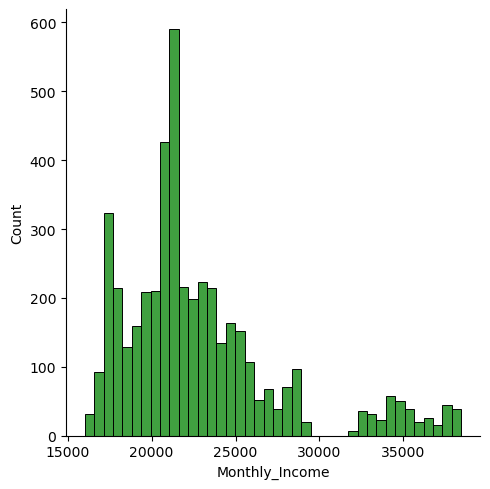

BoxPlot of Monthly_Income
----------------------------------------------------------------------------


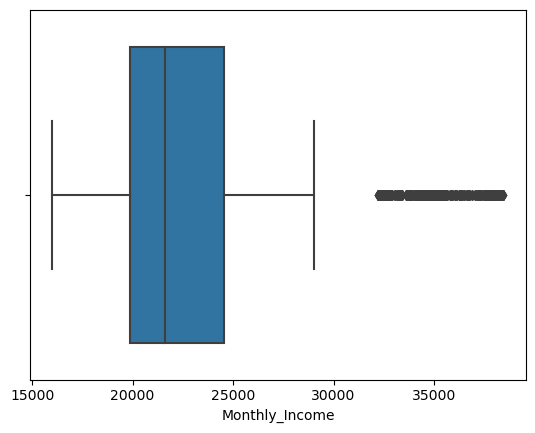

Description of Existing_Policy_Tenure
----------------------------------------------------------------------------
count    4520.000000
mean        4.084071
std         3.285152
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        25.000000
Name: Existing_Policy_Tenure, dtype: float64 Distribution of Existing_Policy_Tenure
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

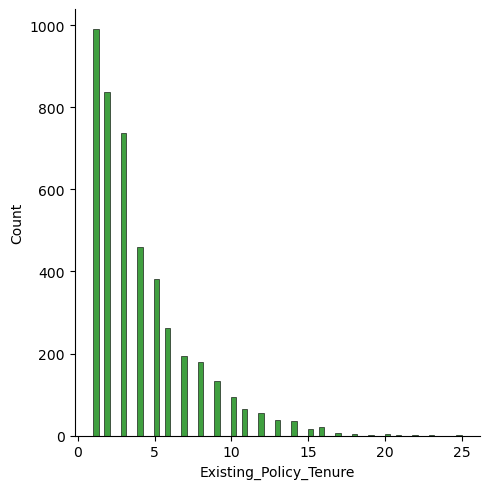

BoxPlot of Existing_Policy_Tenure
----------------------------------------------------------------------------


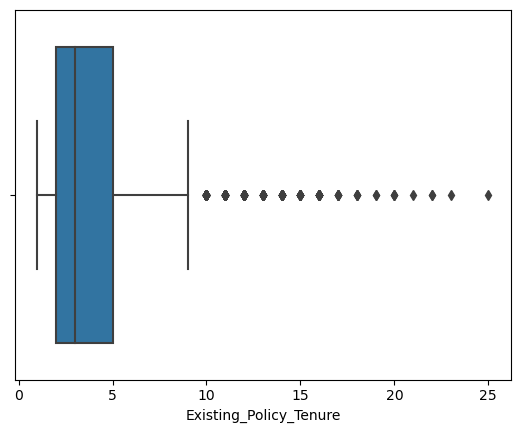

Description of Sum_Assured
----------------------------------------------------------------------------
count    4.520000e+03
mean     6.186020e+05
std      2.421172e+05
min      1.685360e+05
25%      4.444762e+05
50%      5.789765e+05
75%      7.500105e+05
max      1.838496e+06
Name: Sum_Assured, dtype: float64 Distribution of Sum_Assured
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

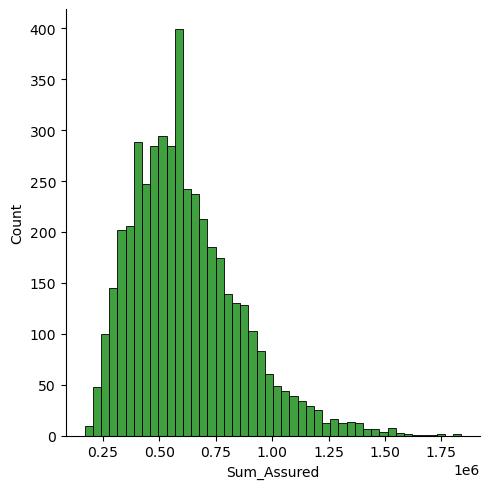

BoxPlot of Sum_Assured
----------------------------------------------------------------------------


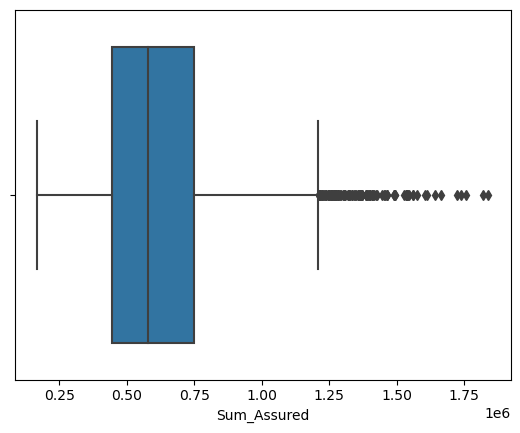

Description of Last_Month_Calls
----------------------------------------------------------------------------
count    4520.000000
mean        4.626991
std         3.620132
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max        18.000000
Name: Last_Month_Calls, dtype: float64 Distribution of Last_Month_Calls
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

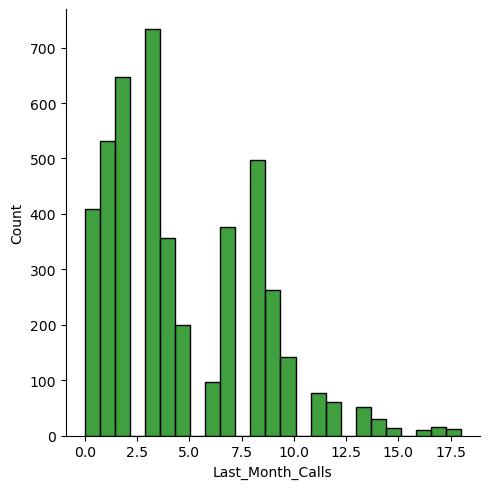

BoxPlot of Last_Month_Calls
----------------------------------------------------------------------------


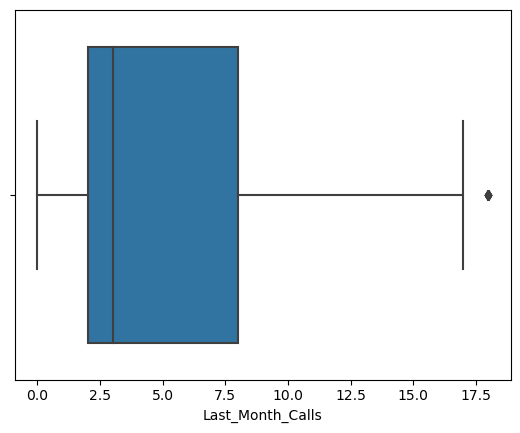

In [142]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [143]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df1_new[cat_column].value_counts())
    df1_new[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column, color = ['red', 'green', 'black', 'blue', 'cyan', 'orange'])
    plt.show()
    print("       ")

In [144]:
df1_cat_new = df1_new.select_dtypes(include = ['object'])
listcatcolumns = list(df1_cat_new.columns.values)
listcatcolumns

['Existing_Product_Type',
 'Complaint',
 'Customer_Care_Score',
 'Channel',
 'Occupation',
 'Education_Field',
 'Gender',
 'Designation',
 'Marital_Status',
 'Zone',
 'Payment_Method']

In [145]:
len(listcatcolumns)

11

Details of Existing_Product_Type
----------------------------------------------------------------
4.0    1916
3.0    1369
5.0     708
2.0     221
1.0     183
6.0     123
Name: Existing_Product_Type, dtype: int64


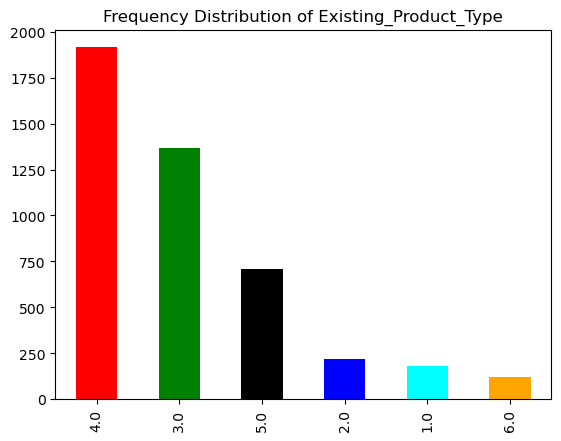

       
Details of Complaint
----------------------------------------------------------------
0.0    3222
1.0    1298
Name: Complaint, dtype: int64


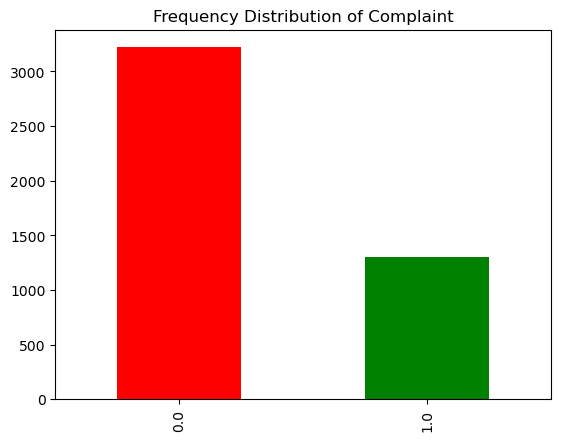

       
Details of Customer_Care_Score
----------------------------------------------------------------
3.0    1419
1.0     928
5.0     893
4.0     826
2.0     454
Name: Customer_Care_Score, dtype: int64


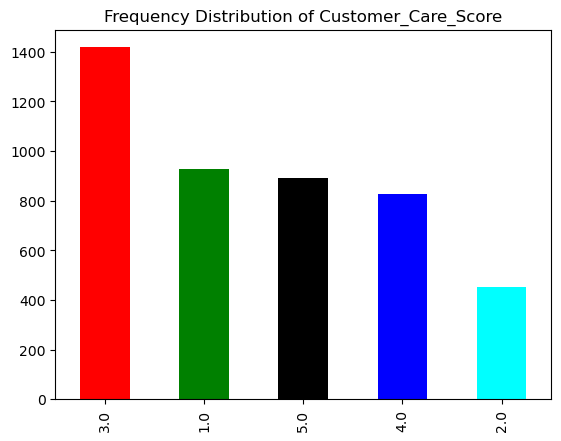

       
Details of Channel
----------------------------------------------------------------
Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64


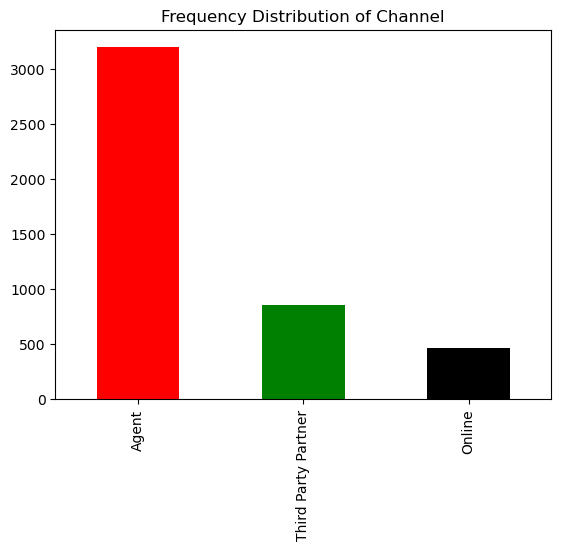

       
Details of Occupation
----------------------------------------------------------------
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64


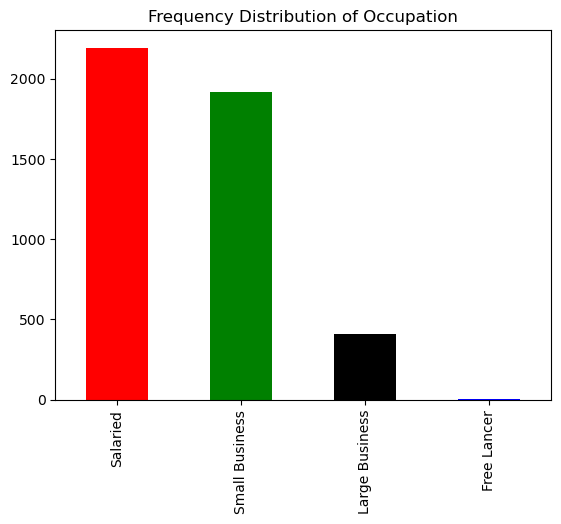

       
Details of Education_Field
----------------------------------------------------------------
Under Graduate    2324
Post Graduate     2196
Name: Education_Field, dtype: int64


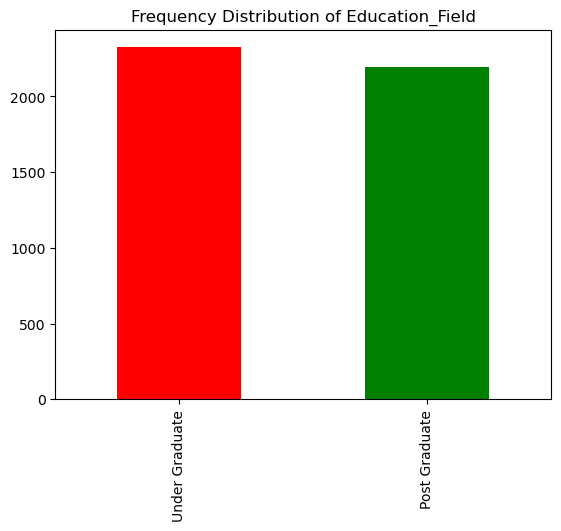

       
Details of Gender
----------------------------------------------------------------
Male      2688
Female    1832
Name: Gender, dtype: int64


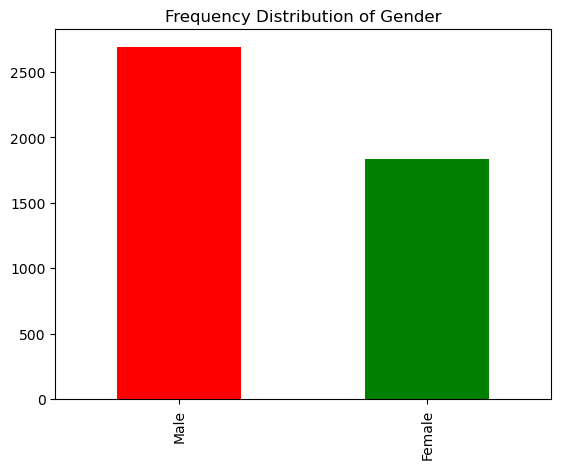

       
Details of Designation
----------------------------------------------------------------
Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64


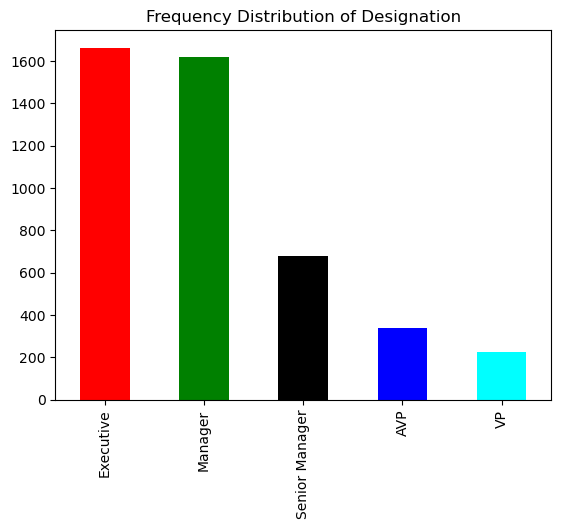

       
Details of Marital_Status
----------------------------------------------------------------
Married     2268
Single      1448
Divorced     804
Name: Marital_Status, dtype: int64


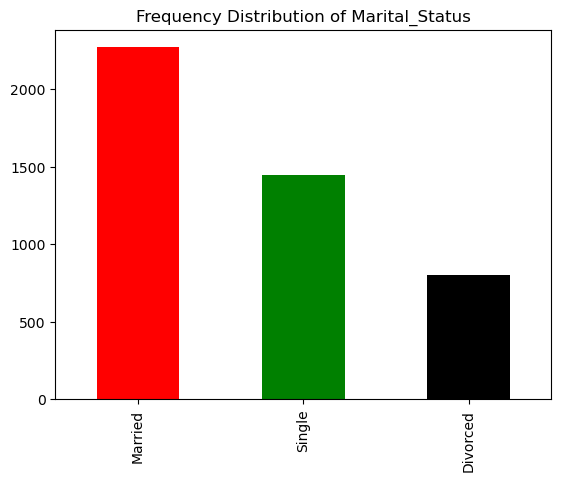

       
Details of Zone
----------------------------------------------------------------
West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64


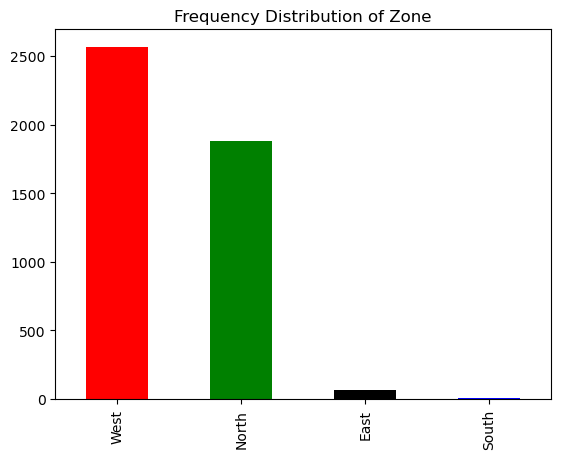

       
Details of Payment_Method
----------------------------------------------------------------
Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: Payment_Method, dtype: int64


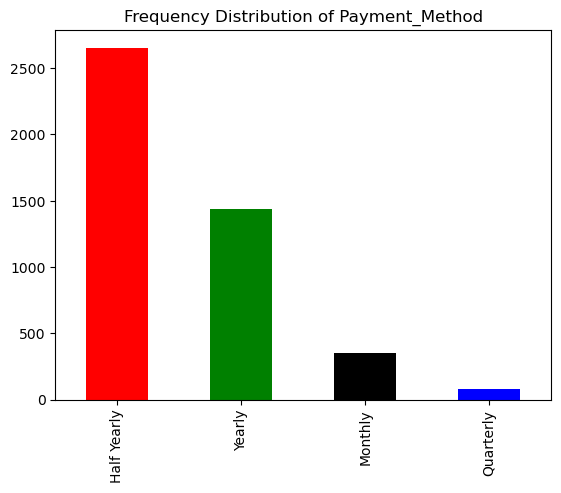

In [146]:
for x in listcatcolumns:
    univariateAnalysis_category(x)

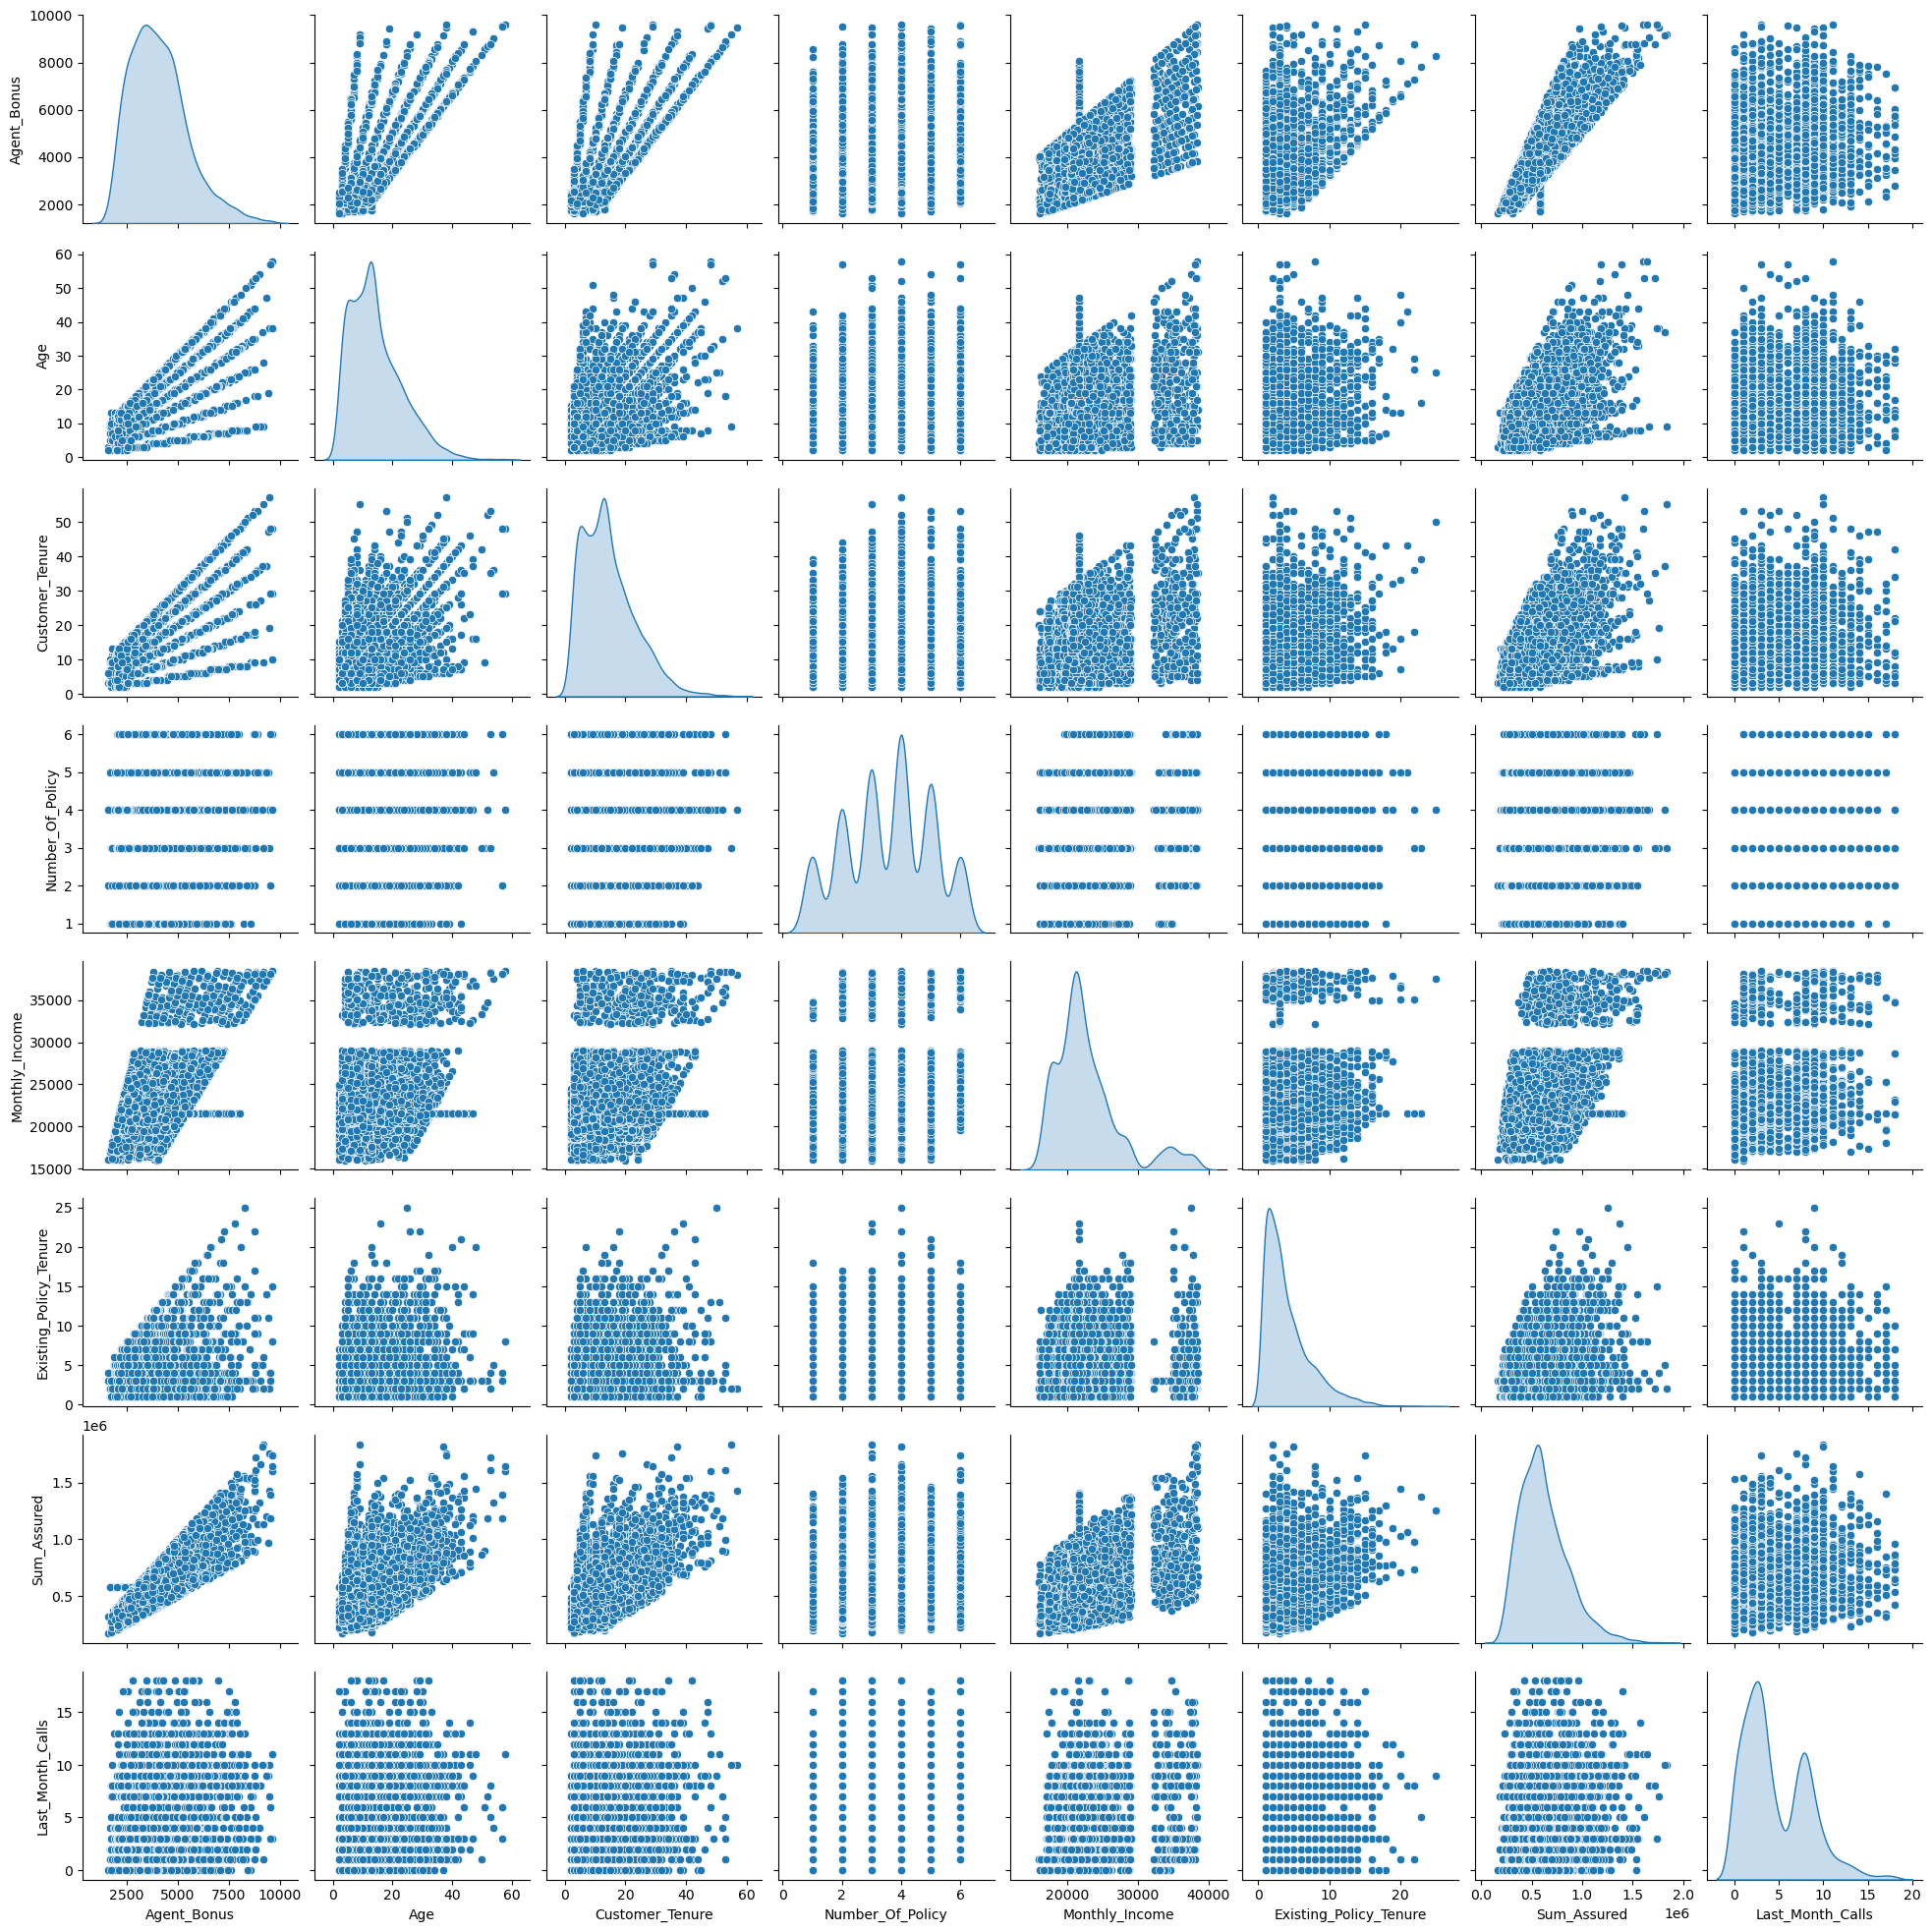

In [147]:
# Performing Multivariate Analysis
sns.pairplot(df1_new,diag_kind='kde')

In [64]:
# Finding correlation among features.
corr = df1_new.corr(method='pearson')

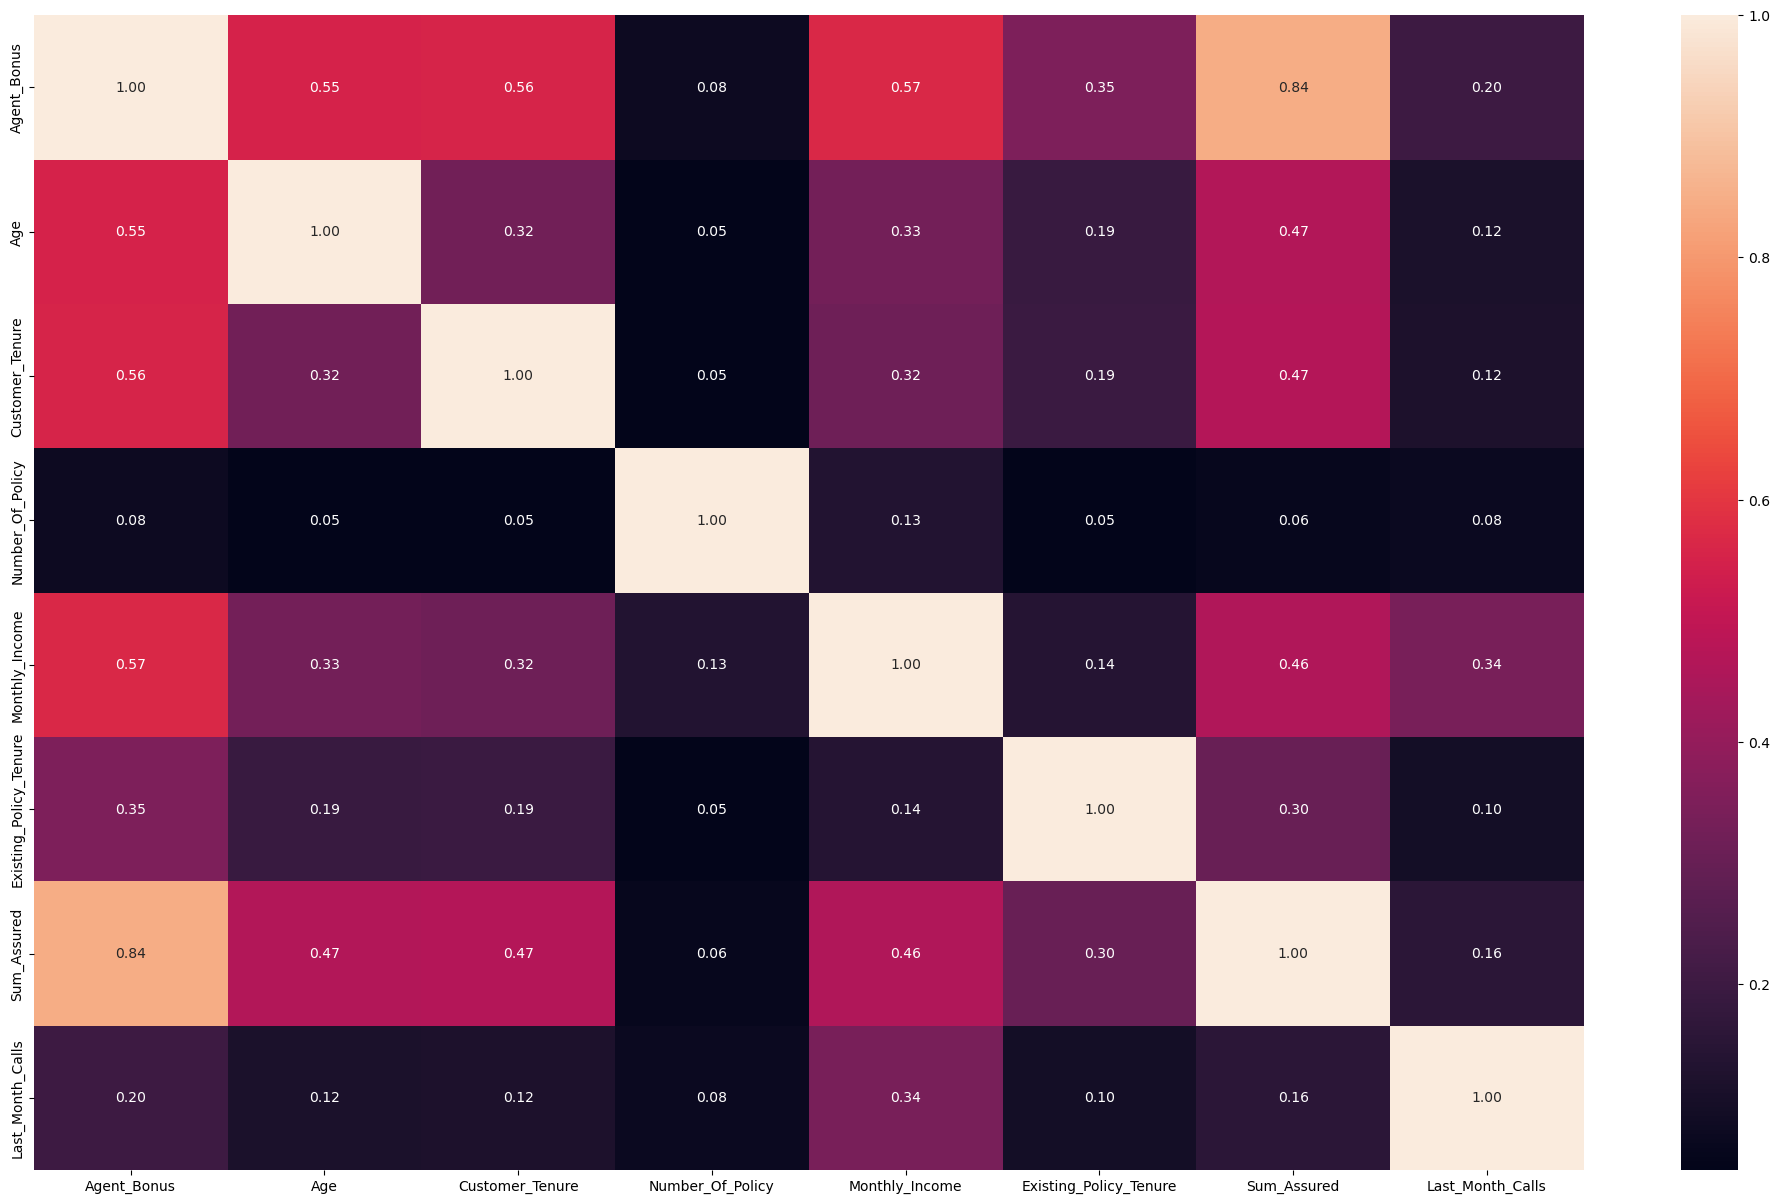

In [65]:
# Plotting heatmap to visualize correlation.
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df1_new.corr(), annot=True,fmt='.2f')
plt.show()

In [91]:
Q1 = df1_new.quantile(0.25)
Q3 = df1_new.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df1_new<(Q1 - 1.5 * IQR)) |(df1_new > (Q3 + 1.5 * IQR))).sum()/df1_new.shape[0]*100),columns = ['Outlier %'],index=None).round(2)

,Outlier %
Age,0.00
Agent_Bonus,0.20
Channel_Agent,0.00
Channel_Online,10.35
Channel_Third_Party_Partner,18.98
Complaint_0.0,0.00
Complaint_1.0,0.00
Customer_Care_Score,0.00
Customer_Tenure,0.00
Designation_AVP,7.43


In [67]:
Q1 = df1_new['Agent_Bonus'].quantile(0.25)
Q3 = df1_new['Agent_Bonus'].quantile(0.75)
IQR = Q3 - Q1
df1_new['Agent_Bonus'] = np.where(df1_new['Agent_Bonus'] < Q1 - 1.5 *IQR, Q1 - 1.5* IQR, df1_new['Agent_Bonus'])
df1_new['Agent_Bonus'] = np.where(df1_new['Agent_Bonus'] > Q3 + 1.5 * IQR, Q1 - 1.5* IQR, df1_new['Agent_Bonus'])

In [68]:
Q1 = df1_new['Customer_Tenure'].quantile(0.25)
Q3 = df1_new['Customer_Tenure'].quantile(0.75)
IQR = Q3 - Q1
df1_new['Customer_Tenure'] = np.where(df1_new['Customer_Tenure'] < Q1 - 1.5 *IQR, Q1 - 1.5* IQR, df1_new['Customer_Tenure'])
df1_new['Customer_Tenure'] = np.where(df1_new['Customer_Tenure'] > Q3 + 1.5 * IQR, Q1 - 1.5* IQR, df1_new['Customer_Tenure'])

In [69]:
Q1 = df1_new['Existing_Policy_Tenure'].quantile(0.25)
Q3 = df1_new['Existing_Policy_Tenure'].quantile(0.75)
IQR = Q3 - Q1
df1_new['Existing_Policy_Tenure'] = np.where(df1_new['Existing_Policy_Tenure'] < Q1 - 1.5 *IQR, Q1 - 1.5* IQR, df1_new['Existing_Policy_Tenure'])
df1_new['Existing_Policy_Tenure'] = np.where(df1_new['Existing_Policy_Tenure'] > Q3 + 1.5 * IQR, Q1 - 1.5* IQR, df1_new['Existing_Policy_Tenure'])

In [70]:
Q1 = df1_new['Last_Month_Calls'].quantile(0.25)
Q3 = df1_new['Last_Month_Calls'].quantile(0.75)
IQR = Q3 - Q1
df1_new['Last_Month_Calls'] = np.where(df1_new['Last_Month_Calls'] < Q1 - 1.5 *IQR, Q1 - 1.5* IQR, df1_new['Last_Month_Calls'])
df1_new['Last_Month_Calls'] = np.where(df1_new['Last_Month_Calls'] > Q3 + 1.5 * IQR, Q1 - 1.5* IQR, df1_new['Last_Month_Calls'])

In [71]:
Q1 = df1_new['Monthly_Income'].quantile(0.25)
Q3 = df1_new['Monthly_Income'].quantile(0.75)
IQR = Q3 - Q1
df1_new['Monthly_Income'] = np.where(df1_new['Monthly_Income'] < Q1 - 1.5 *IQR, Q1 - 1.5* IQR, df1_new['Monthly_Income'])
df1_new['Monthly_Income'] = np.where(df1_new['Monthly_Income'] > Q3 + 1.5 * IQR, Q1 - 1.5* IQR, df1_new['Monthly_Income'])

In [72]:
Q1 = df1_new['Sum_Assured'].quantile(0.25)
Q3 = df1_new['Sum_Assured'].quantile(0.75)
IQR = Q3 - Q1
df1_new['Sum_Assured'] = np.where(df1_new['Sum_Assured'] < Q1 - 1.5 *IQR, Q1 - 1.5* IQR, df1_new['Sum_Assured'])
df1_new['Sum_Assured'] = np.where(df1_new['Sum_Assured'] > Q3 + 1.5 * IQR, Q1 - 1.5* IQR, df1_new['Sum_Assured'])

In [73]:
Q1 = df1_new['Age'].quantile(0.25)
Q3 = df1_new['Age'].quantile(0.75)
IQR = Q3 - Q1
df1_new['Age'] = np.where(df1_new['Age'] < Q1 - 1.5 *IQR, Q1 - 1.5* IQR, df1_new['Age'])
df1_new['Age'] = np.where(df1_new['Age'] > Q3 + 1.5 * IQR, Q1 - 1.5* IQR, df1_new['Age'])

In [75]:
Q1 = df1_new.quantile(0.25)
Q3 = df1_new.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df1_new<(Q1 - 1.5 * IQR)) |(df1_new > (Q3 + 1.5 * IQR))).sum()/df1_new.shape[0]*100),columns = ['Outlier %'],index=None).round(2)

,Outlier %
Age,0.0
Agent_Bonus,0.2
Channel,0.0
Complaint,0.0
Customer_Care_Score,0.0
Customer_Tenure,0.0
Designation,0.0
Education_Field,0.0
Existing_Policy_Tenure,0.0
Existing_Product_Type,0.0


In [76]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding.
df1_new = pd.get_dummies(df1_new, columns=['Channel','Occupation','Education_Field','Gender','Designation','Marital_Status','Zone','Payment_Method','Existing_Product_Type','Complaint'])

In [77]:
df1_new.head()

,Agent_Bonus,Age,Customer_Tenure,Number_Of_Policy,Monthly_Income,Existing_Policy_Tenure,Sum_Assured,Last_Month_Calls,Customer_Care_Score,Channel_Agent,...,Payment_Method_Quarterly,Payment_Method_Yearly,Existing_Product_Type_1.0,Existing_Product_Type_2.0,Existing_Product_Type_3.0,Existing_Product_Type_4.0,Existing_Product_Type_5.0,Existing_Product_Type_6.0,Complaint_0.0,Complaint_1.0
0,4409.0,22.0,4.0,2.0,20993.0,2.0,806761.0,5.0,2.0,1,...,0,0,0,0,1,0,0,0,0,1
1,2214.0,11.0,2.0,4.0,20130.0,3.0,294502.0,7.0,3.0,0,...,0,1,0,0,0,1,0,0,1,0
2,4273.0,26.0,4.0,3.0,17090.0,2.0,578976.5,0.0,3.0,1,...,0,1,0,0,0,1,0,0,0,1
3,1791.0,11.0,13.0,3.0,17909.0,2.0,268635.0,0.0,5.0,0,...,0,0,0,0,1,0,0,0,0,1
4,2955.0,6.0,13.0,4.0,18468.0,4.0,366405.0,2.0,5.0,1,...,0,0,0,0,1,0,0,0,1,0


In [78]:
# Fixing messy column names (containing spaces) for ease of use
df1_new.columns = df1_new.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [79]:
pd.options.display.max_columns = None

In [80]:
df1_new.head()

,Agent_Bonus,Age,Customer_Tenure,Number_Of_Policy,Monthly_Income,Existing_Policy_Tenure,Sum_Assured,Last_Month_Calls,Customer_Care_Score,Channel_Agent,Channel_Online,Channel_Third_Party_Partner,Occupation_Free_Lancer,Occupation_Large_Business,Occupation_Salaried,Occupation_Small_Business,Education_Field_Post_Graduate,Education_Field_Under_Graduate,Gender_Female,Gender_Male,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior_Manager,Designation_VP,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Zone_East,Zone_North,Zone_South,Zone_West,Payment_Method_Half_Yearly,Payment_Method_Monthly,Payment_Method_Quarterly,Payment_Method_Yearly,Existing_Product_Type_1.0,Existing_Product_Type_2.0,Existing_Product_Type_3.0,Existing_Product_Type_4.0,Existing_Product_Type_5.0,Existing_Product_Type_6.0,Complaint_0.0,Complaint_1.0
0,4409.0,22.0,4.0,2.0,20993.0,2.0,806761.0,5.0,2.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,2214.0,11.0,2.0,4.0,20130.0,3.0,294502.0,7.0,3.0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,4273.0,26.0,4.0,3.0,17090.0,2.0,578976.5,0.0,3.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1791.0,11.0,13.0,3.0,17909.0,2.0,268635.0,0.0,5.0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
4,2955.0,6.0,13.0,4.0,18468.0,4.0,366405.0,2.0,5.0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [81]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Agent_Bonus                     4520 non-null   float64
 1   Age                             4520 non-null   float64
 2   Customer_Tenure                 4520 non-null   float64
 3   Number_Of_Policy                4520 non-null   float64
 4   Monthly_Income                  4520 non-null   float64
 5   Existing_Policy_Tenure          4520 non-null   float64
 6   Sum_Assured                     4520 non-null   float64
 7   Last_Month_Calls                4520 non-null   float64
 8   Customer_Care_Score             4520 non-null   object 
 9   Channel_Agent                   4520 non-null   uint8  
 10  Channel_Online                  4520 non-null   uint8  
 11  Channel_Third_Party_Partner     4520 non-null   uint8  
 12  Occupation_Free_Lancer          45

In [ ]:
min_max = MinMaxScaler()

In [ ]:
df2_scaled = pd.DataFrame(columns= df2.columns, data = min_max.fit_transform(df2))

In [ ]:
df2_scaled.describe().T.round(2)

In [ ]:
df2.describe().T.round(2)

In [82]:
# Copy all the predictor variables into X dataframe
X = df1_new.drop('Agent_Bonus', axis=1)

# Copy target into the y dataframe. 
y = df1_new[['Agent_Bonus']]

In [85]:
X.head()

,Age,Customer_Tenure,Number_Of_Policy,Monthly_Income,Existing_Policy_Tenure,Sum_Assured,Last_Month_Calls,Customer_Care_Score,Channel_Agent,Channel_Online,Channel_Third_Party_Partner,Occupation_Free_Lancer,Occupation_Large_Business,Occupation_Salaried,Occupation_Small_Business,Education_Field_Post_Graduate,Education_Field_Under_Graduate,Gender_Female,Gender_Male,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior_Manager,Designation_VP,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Zone_East,Zone_North,Zone_South,Zone_West,Payment_Method_Half_Yearly,Payment_Method_Monthly,Payment_Method_Quarterly,Payment_Method_Yearly,Existing_Product_Type_1.0,Existing_Product_Type_2.0,Existing_Product_Type_3.0,Existing_Product_Type_4.0,Existing_Product_Type_5.0,Existing_Product_Type_6.0,Complaint_0.0,Complaint_1.0
0,22.0,4.0,2.0,20993.0,2.0,806761.0,5.0,2.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,11.0,2.0,4.0,20130.0,3.0,294502.0,7.0,3.0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,26.0,4.0,3.0,17090.0,2.0,578976.5,0.0,3.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,11.0,13.0,3.0,17909.0,2.0,268635.0,0.0,5.0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
4,6.0,13.0,4.0,18468.0,4.0,366405.0,2.0,5.0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [87]:
y

,Agent_Bonus
0,4409.0
1,2214.0
2,4273.0
3,1791.0
4,2955.0
...,...
4515,3953.0
4516,2939.0
4517,3792.0
4518,4816.0


In [88]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)

In [ ]:
X_train_sm

In [ ]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
lr

In [ ]:
print(lr.summary())

In [ ]:
X_train.corr()

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train = X_train.drop(corr_features,axis=1)
X_train

In [ ]:
X_test = X_test.drop(corr_features,axis=1)
X_test

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

In [ ]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
#Summary of training data
import statsmodels.api as sm
results_random_train1 = sm.OLS(y_train,X_train).fit()
results_random_train1.summary()

In [ ]:
# Summary of testing data
import statsmodels.api as sm
results_random_test1 = sm.OLS(y_test,X_test).fit()
results_random_test1.summary()

In [ ]:
# Function to calculate MAPE values
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
# MAPE values for test data
mape(y_test,X_test)

In [ ]:
# MAPE values for train data
mape(y_train, X_train)

In [ ]:
# Model Tuning

param_grid = {
    'n_jobs' :[0,1,2,3,4,5]
}
grid_search_lr = GridSearchCV(estimator = regression_model, param_grid = param_grid, cv = 6)

In [ ]:
grid_search_lr.fit(X_train, y_train)

In [ ]:
grid_search_lr.best_params_

In [ ]:
grid_search_lr.score(X_train, y_train)

In [ ]:
grid_search_lr.score(X_test, y_test)

In [ ]:
#RMSE on Training data
predicted_train=grid_search_lr.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=grid_search_lr.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
#Summary of training data
import statsmodels.api as sm
results_random_train1 = sm.OLS(y_train,X_train).fit()
results_random_train1.summary()

In [ ]:
# Summary of testing data
import statsmodels.api as sm
results_random_test1 = sm.OLS(y_test,X_test).fit()
results_random_test1.summary()

### Ridge and Lasso regression

In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

In [ ]:
# R square on training data
print(ridge.score(X_train, y_train))
# R square on testing data
print(ridge.score(X_test, y_test))

In [ ]:
#RMSE on Training data
predicted_train=ridge.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=ridge.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
# Function to find MAPE values
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
# MAPE values for test data
mape(y_test,X_test)

In [ ]:
# MAPE values for training data
mape(y_train, X_train)

In [ ]:
import statsmodels.api as sm
results_test = sm.OLS(y_test,X_test).fit()
results_test.summary()

In [ ]:
import statsmodels.api as sm
results_train = sm.OLS(y_train,X_train).fit()
results_train.summary()

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

In [ ]:
#RMSE on Training data
predicted_train=lasso.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=lasso.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(y_test,X_test)

In [ ]:
import statsmodels.api as sm
results = sm.OLS(y_test,X_test).fit()
results.summary()

In [ ]:
# Model Tuning


In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [ ]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_tet = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

In [ ]:
#RMSE on Training data
predicted_train=ridge.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=ridge.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

In [ ]:
#RMSE on Training data
predicted_train=lasso.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=lasso.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

### KNN Regression

In [ ]:
KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train,y_train)

In [ ]:
# R square on training data
KNN_model.score(X_train, y_train)

In [ ]:
# R sqaure on Testing data
KNN_model.score(X_test,y_test)

In [ ]:
#RMSE on Training data
predicted_train=KNN_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_train=KNN_model.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
# Summary of the training data
import statsmodels.api as sm
results_Train_KNN = sm.OLS(y_train,X_train).fit()
results_Train_KNN.summary()

In [ ]:
# Summary of the testing data
import statsmodels.api as sm
results_Test_KNN = sm.OLS(y_test,X_test).fit()
results_Test_KNN.summary()

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
# MAPE values for training data
mape(y_train, X_train)

In [ ]:
# MAPE values for Test data
mape(y_test, X_test)

In [ ]:
# Model Tuning
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
KNN_model=KNeighborsRegressor(n_neighbors = 15)
KNN_model.fit(X_train,y_train)

In [ ]:
# R square on training data
KNN_model.score(X_train, y_train)

In [ ]:
# R sqaure on Testing data
KNN_model.score(X_test,y_test)

In [ ]:
#RMSE on Training data
predicted_train=KNN_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_train=KNN_model.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
# MAPE values for training data
mape(y_train, X_train)

In [ ]:
# MAPE values for Test data
mape(y_test, X_test)

In [ ]:
# Summary of the training data
import statsmodels.api as sm
results_Train_KNN = sm.OLS(y_train,X_train).fit()
results_Train_KNN.summary()

In [ ]:
# Summary of the testing data
import statsmodels.api as sm
results_Test_KNN = sm.OLS(y_test,X_test).fit()
results_Test_KNN.summary()

### Random Forest Regressor

In [ ]:

 # create regressor object
regressor = RandomForestRegressor()
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
# R square on training data
regressor.score(X_train, y_train)

In [ ]:
# R square on testing data
regressor.score(X_test, y_test)

In [ ]:
#RMSE on Training data
predicted_train=regressor.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=regressor.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
#Summary of training data
import statsmodels.api as sm
results_random_train = sm.OLS(y_train,X_train).fit()
results_random_train.summary()

In [ ]:
# Summary of testing data
import statsmodels.api as sm
results_random_test = sm.OLS(y_test,X_test).fit()
results_random_test.summary()

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(y_test,X_test)

In [ ]:
mape(y_train, X_train)

In [ ]:
# Model Tuning


param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_train, y_train)

In [ ]:
grid_search.score(X_test, y_test)

In [ ]:
#RMSE on Training data
predicted_train=grid_search.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=grid_search.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
#Summary of training data
import statsmodels.api as sm
results_random_train1 = sm.OLS(y_train,X_train).fit()
results_random_train1.summary()

In [ ]:
# Summary of testing data
import statsmodels.api as sm
results_random_test1 = sm.OLS(y_test,X_test).fit()
results_random_test1.summary()